**Business Case:**

Build a classifier model to predict the credit card defaulter for the given dataset

**Dataset:**
Credit Card Defaulter Dataset

**Date:** 18-10-2022

In [195]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
#importing the dataset
data = pd.read_csv('C:/Users/2211583/OneDrive - Cognizant/Python practice/Assignment by trainer/Assignment/Assignment 2/credit_card_defaulter.csv')

In [197]:
data.head()#Checking the first five rows

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.62507
1,2,No,Yes,817.180407,12106.13470
2,3,No,No,1073.549164,31767.13895
3,4,No,No,529.250605,35704.49394
4,5,No,No,785.655883,38463.49588


In [198]:
data.info() #Checking the datatypes and Number of records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [199]:
data.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462905
50%,5000.50000,823.636973,34552.644800
75%,7500.25000,1166.308387,43807.729275
max,10000.00000,2654.322576,73554.233500


**Conclusion:** The mean of balance is 835.374886 with a standard deviation of 483.714985 (This indicates that the spread is large). The mean of income is 33516.981876 with a SD is 13336.64. (Indicating the spread is large)

In [200]:
data.drop(['Unnamed: 0'],axis = 1, inplace = True) #Dropping the index variable

In [201]:
data.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [202]:
data['default'].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

**Conclusion:** There is an imbalaced in the labels.

**CHECKING FOR MISSING VALUES**

In [203]:
data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

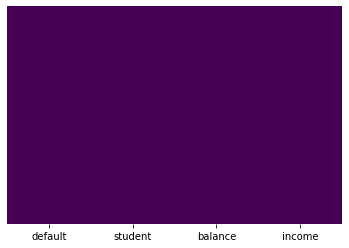

In [204]:
sns.heatmap(data.isnull(),cmap = 'viridis',cbar = False, yticklabels  = False)

**Conclusion:** There are no missing values in the dataset

**Exploratory Data Analysis**

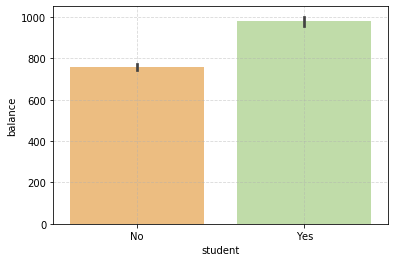

In [205]:
sns.barplot(y = 'balance',x = 'student',data = data,estimator = np.median,palette = 'Spectral')
plt.grid(ls = 'dashed',alpha = 0.5)

**Conclusion:** This indicates that the median balance for studetns are higher as compared to non-students

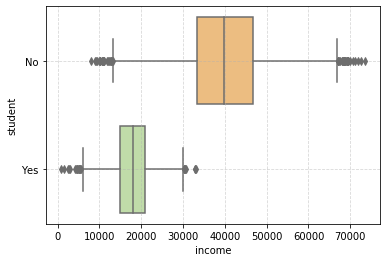

In [206]:
sns.boxplot(x = 'income',y = 'student',data = data,palette = 'Spectral')
plt.grid(ls = 'dashed',alpha = 0.5)

**Conclusion:** The median income of student is low as compared to people who are not students

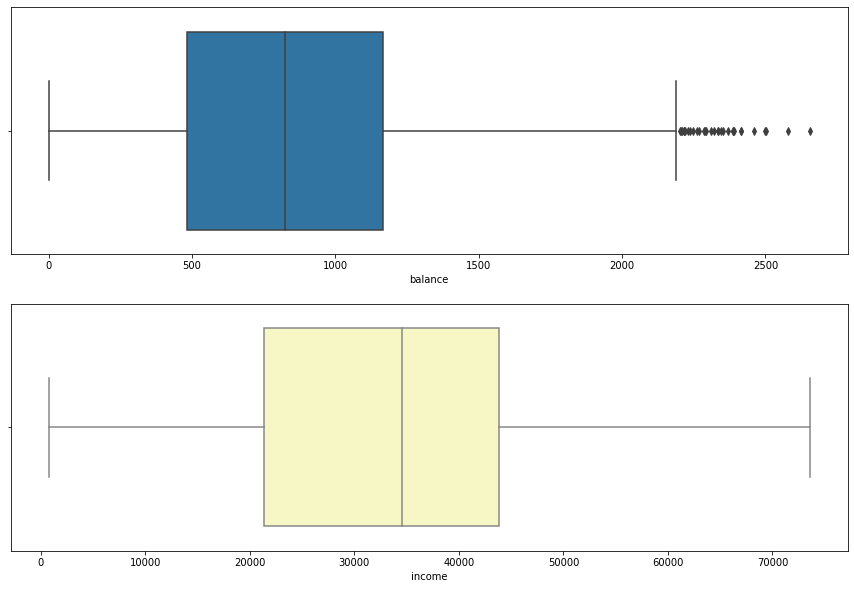

In [207]:
#Boxplot to check the presence of outliers
fig, axes = plt.subplots(2, 1, figsize = (15, 10))
sns.boxplot('balance',data = data,ax = axes[0])
sns.boxplot('income',data = data,ax = axes[1],palette = 'Spectral')

**Conclusion:** There are outliers in the data

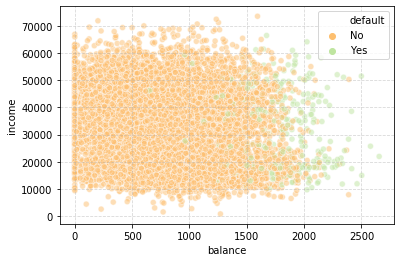

In [208]:
sns.scatterplot(x = 'balance',y = 'income',hue = 'default',data = data,palette = 'Spectral',alpha =0.5)
plt.grid(ls = 'dashed',alpha = 0.5)

**Conclusion:** It seems that  a linear model based classification will not do good job.

**DATA WRANGLING**

In [209]:
#Removing Outliers

In [210]:
#Step 1: Finding the Interquantiles
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3-Q1

In [211]:
#Step 2: Finding the uppper limit and lower limit
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [212]:
#Step 3: Having a look at the outliers
data[data['balance'] > upper_limit]
print(len(data[data['balance'] > upper_limit]))

31


In [213]:
#Now for finding the values which are less the lower limit
data[data['balance'] < lower_limit] 
print(len(data[data['balance'] < lower_limit]))

0


In [214]:
#Step 4: Removing the outliers from the data
new_data = data[(data['balance'] < upper_limit) & (data['balance'] > lower_limit)]

In [215]:
len(new_data)

9969

**Conclusion:** The data sizes reduces after the outliers are removed.

In [216]:
# Creating dummy variables for the categorical Data

In [217]:
data_dummies = pd.get_dummies(new_data,columns = ['student','default'],drop_first = True)

In [218]:
data_dummies.head()

,balance,income,student_Yes,default_Yes
0,729.526495,44361.62507,0,0
1,817.180407,12106.13470,1,0
2,1073.549164,31767.13895,0,0
3,529.250605,35704.49394,0,0
4,785.655883,38463.49588,0,0


**DIVIDING THE DATASET INTO TRAIN AND TEST**

In [219]:
from sklearn.model_selection import train_test_split #importing the library

In [220]:
X = data_dummies.iloc[:,0:len(data_dummies.columns)-1] #Independent variables

In [221]:
Y = data_dummies.iloc[:,-1] #Dependent Variable

In [222]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state = 105,test_size = 0.3)#Splitting the data into train and test

In [223]:
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of Y_train is {Y_train.shape}')
print(f'The shape of X_test is  {X_test.shape}')
print(f'The shape of Y_test is  {Y_test.shape}')

The shape of X_train is (6978, 3)
The shape of Y_train is (6978,)
The shape of X_test is  (2991, 3)
The shape of Y_test is  (2991,)


In [224]:
Y_test.value_counts()

0    2897
1      94
Name: default_Yes, dtype: int64

**PERFORMING THE SCALING**

In [225]:
from sklearn.preprocessing import StandardScaler #Inporting the library for standardizing the data

In [226]:
scaled = StandardScaler() #Creating an instance

In [227]:
X_train.iloc[:,0:2].head()

,balance,income
7843,778.819743,31986.57121
5850,1054.805589,52290.34067
9521,1036.117398,15067.74824
4135,1517.804161,12958.65092
9857,1021.279600,44718.40772


In [228]:
scaled.fit(X_train.iloc[:,0:2])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [229]:
X_train.iloc[:,0:2] = scaled.transform(X_train.iloc[:,0:2]) #Replacing the numeric independent variables in the train dataset with its scaled version.

C:\Users\2211583\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [230]:
X_train.head()

,balance,income,student_Yes
7843,-0.103519,-0.118081,0
5850,0.478120,1.406771,0
9521,0.438735,-1.388716,1
4135,1.453889,-1.547113,1
9857,0.407464,0.838104,0


In [231]:
X_test.iloc[:,0:2] = scaled.transform(X_test.iloc[:,0:2]) #Replacing the numeric independent variables in the test dataset with its scaled version.

C:\Users\2211583\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [232]:
X_test.head()

,balance,income,student_Yes
908,0.543521,-1.101641,1
8025,1.414660,-1.201515,1
6404,0.066260,-1.071805,1
1161,-0.471287,0.227852,0
9411,0.078949,1.520060,0


**Building the model**

**Random Forest**

In [233]:
#importing the library for Random Forest
from sklearn.ensemble import RandomForestClassifier

In [234]:
#selecting the best parameters using Grid Search
from sklearn.model_selection import GridSearchCV

In [235]:
model_randomforest = RandomForestClassifier()

In [304]:
#Creating a dictionary of candidate parameter values
param_grid = {'n_estimators': [100,120,125,150,155],'criterion':['gini','entropy'],'max_depth':[3,4],'random_state': [101]} 

In [305]:
grid = GridSearchCV(model_randomforest,param_grid)

In [306]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [307]:
grid.best_params_ #Selecting the best parameter values

{'criterion': 'gini', 'max_depth': 4, 'n_estimators': 100, 'random_state': 101}

In [308]:
#Using the best parameters for the random Forest
model_best_forest = RandomForestClassifier(n_estimators = 100,max_depth = 4,criterion = 'gini',random_state = 101)

In [309]:
model_best_forest.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=101,
                       verbose=0, warm_start=False)

In [310]:
pred_forest = model_best_forest.predict(X_test) #Predicting the classes using the above model

In [311]:
model_best_forest.score(X_test,pred_forest) #Model Performance in terms of score

1.0

In [312]:
# Importing the required metrics to compare the models
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score 

In [313]:
print(confusion_matrix(Y_test,pred_forest)) # Confusion Matrix

[[2882   15]
 [  70   24]]


In [314]:
print(classification_report(Y_test,pred_forest)) # Other important Metrics 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2897
           1       0.62      0.26      0.36        94

    accuracy                           0.97      2991
   macro avg       0.80      0.63      0.67      2991
weighted avg       0.96      0.97      0.97      2991



**Conclusion:** Here, we cannot consider the accuracy as the data is very imbalanced. When we consider the F1 score of 1s, it is very low (i.e.) just 36%. (We only consider the F1 Score of 1s alone because in this business case, predicting the defaulter is more important.)

In [315]:
#ROC CURVE
#Step 1: Finding the predicted probabilities
model_best_Forest_prob = model_best_forest.predict_proba(X_test)[::,1]

In [316]:
model_best_Forest_prob

array([0.01246095, 0.0613361 , 0.01347915, ..., 0.12206654, 0.00862841,
       0.00844028])

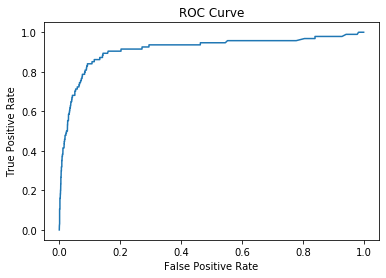

In [317]:
#Step 2: finding out the TPR and FPR
FPR_RF, TPR_RF,_ = roc_curve(Y_test,  model_best_Forest_prob)
plt.plot(FPR_RF,TPR_RF)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [318]:
print(f'THe AUC is {roc_auc_score(Y_test, model_best_Forest_prob)}')

THe AUC is 0.9137901277183293


**XG Boost**

In [319]:
#pip install xgboost

In [320]:
import xgboost as xgb #Importing the library for XG Boost

In [321]:
model_xgb = xgb.XGBClassifier() #Creating an instance of the object

In [322]:
#Creating a dictionary of candidate parameter values
param_grid = {'eta': [0.01,0.15,0.2,0.3],'max_depth':[3,4,5,6]} 

In [323]:
grid_xgb = GridSearchCV(model_xgb,param_grid)

In [324]:
grid_xgb.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None,
 

In [325]:
grid_xgb.best_params_ #Selecting the best parameter values

{'eta': 0.01, 'max_depth': 3}

In [326]:
model_xgb_best = xgb.XGBClassifier(eta = 0.01,max_depth = 3,random_state = 101) #Using the best parameters

In [327]:
model_xgb_best.fit(X_train,Y_train) #Fiting the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.01,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.00999999978, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=101, ...)

In [328]:
pred_xgb = model_xgb_best.predict(X_test) #Predicting the classses

In [329]:
print(confusion_matrix(Y_test,pred_xgb)) #The confusion Matrix

[[2877   20]
 [  66   28]]


In [330]:
print(classification_report(Y_test,pred_xgb)) #Other important Metrics

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2897
           1       0.58      0.30      0.39        94

    accuracy                           0.97      2991
   macro avg       0.78      0.65      0.69      2991
weighted avg       0.97      0.97      0.97      2991



**Conclusion:** Here, too we have the same issue, accuracy cannot be used for conclusion, since it is biased. We use F1 Score for conclusion (Since predicting 1s is more important than 0s, we just consider the F1 score of 1s, which is 39%)

In [332]:
#ROC CURVE
#Step 1: Finding the predicted probabilities
model_xgb_prob = model_xgb_best.predict_proba(X_test)[::,1]

In [333]:
model_xgb_prob

array([0.1855115 , 0.2612853 , 0.1855115 , ..., 0.30905426, 0.1855115 ,
       0.1855115 ], dtype=float32)

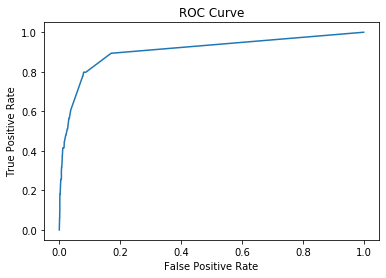

In [334]:
#Step 2: finding out the TPR and FPR
FPR_xgb, TPR_xgb,_ = roc_curve(Y_test,  model_xgb_prob)
plt.plot(FPR_xgb,TPR_xgb)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

In [335]:
print(f'THe AUC is {roc_auc_score(Y_test, model_xgb_prob)}')

THe AUC is 0.9071893888762402


**Conclusion:** The AUC of Random Forest is comparitively higher as compared to XG Boost.

**COMPARING THE ROC CURVES**

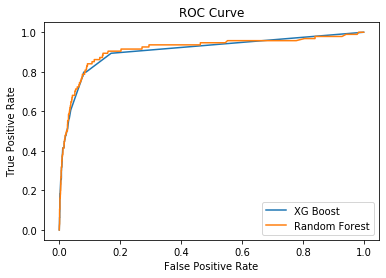

In [338]:
plt.plot(FPR_xgb,TPR_xgb)
plt.plot(FPR_RF,TPR_RF)
plt.legend(['XG Boost','Random Forest'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve')
plt.show()

**CONCLUSION:** Here, we can see the comparison of the ROC curve of XG boost and Random Forest. Random Forest has a higher AUC. But, since the F1 score is higher for XG Boost of predicting 1s, **XG Boost is found to be a better model for the prediction** 